In [ ]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score


from google.colab import drive
drive.mount('/content/drive')
filepath = '/content/drive/MyDrive/AOSC11/transportation_dataset.csv'

df = pd.read_csv(filepath)
display(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Record_ID,Timestamp,Latitude,Longitude,Road_ID,Vehicle_Count,Avg_Speed(km/h),Vehicle_Type,Traffic_Density,Weather,Visibility(m),Road_Condition,Accident_Occurred,Accident_Severity,Alert_Generated,temperature,humidity
0,1,03-10-2023 09:50,32.004714,76.971961,RD-285,419,90,Mixed,Medium,Fog,5663,Under Maintenance,Yes,Major,Yes,31.24,61.12
1,2,09-06-2019 08:01,10.632732,77.828652,RD-384,232,104,Mixed,Very High,Rain,896,Wet,No,-,No,48.52,33.07
2,3,08-01-2020 01:38,12.258165,88.810189,RD-282,339,100,Bus,Medium,Storm,9369,Under Maintenance,No,-,No,41.96,43.97
3,4,18-10-2022 05:43,34.289950,95.415253,RD-128,74,63,Car,Low,Clear,2510,Slippery,Yes,Fatal,No,37.96,59.52
4,5,29-06-2023 23:11,31.698993,77.675486,RD-49,187,73,Mixed,Low,Storm,3447,Wet,No,-,No,24.68,48.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,5496,29-06-2018 00:52,26.411744,89.346236,RD-186,489,73,Bike,Medium,Storm,5256,Under Maintenance,No,-,No,30.01,51.57
5496,5497,23-04-2019 23:23,22.836886,76.580499,RD-442,18,66,Bus,High,Storm,9625,Dry,No,-,No,37.38,85.60
5497,5498,23-12-2022 05:35,17.626293,74.393270,RD-390,433,81,Bike,Very High,Rain,1746,Dry,No,-,No,46.67,71.92
5498,5499,18-01-2019 19:05,10.919562,72.990183,RD-277,251,63,Car,Medium,Snow,7601,Under Maintenance,No,-,No,37.08,45.43


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Record_ID          5500 non-null   int64  
 1   Timestamp          5500 non-null   object 
 2   Latitude           5500 non-null   float64
 3   Longitude          5500 non-null   float64
 4   Road_ID            5500 non-null   object 
 5   Vehicle_Count      5500 non-null   int64  
 6   Avg_Speed(km/h)    5500 non-null   int64  
 7   Vehicle_Type       5500 non-null   object 
 8   Traffic_Density    5500 non-null   object 
 9   Weather            5500 non-null   object 
 10  Visibility(m)      5500 non-null   int64  
 11  Road_Condition     5500 non-null   object 
 12  Accident_Occurred  5500 non-null   object 
 13  Accident_Severity  5500 non-null   object 
 14  Alert_Generated    5500 non-null   object 
 15  temperature        5500 non-null   float64
 16  humidity           5500 

In [ ]:
df.describe()

,Record_ID,Latitude,Longitude,Vehicle_Count,Avg_Speed(km/h),Visibility(m),temperature,humidity,Accident_Occurred_Flag
count,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000
mean,2750.500000,22.572905,82.476797,254.092364,61.324909,5046.928364,34.903933,59.617035,0.104545
std,1587.857571,8.356760,8.356606,141.397428,33.207133,2806.171704,8.674031,17.155972,0.305995
min,1.000000,8.000245,68.007834,10.000000,5.000000,201.000000,20.000000,30.000000,0.000000
25%,1375.750000,15.480326,75.370574,131.000000,33.000000,2640.000000,27.400000,44.800000,0.000000
50%,2750.500000,22.616598,82.322999,255.000000,60.000000,5007.000000,34.935000,59.510000,0.000000
75%,4125.250000,29.930907,89.738211,377.250000,90.000000,7515.000000,42.382500,74.292500,0.000000
max,5500.000000,36.998251,96.991006,499.000000,119.000000,9998.000000,49.990000,89.980000,1.000000


In [ ]:
newdf = df.drop(columns = (['Record_ID','Timestamp','Latitude','Longitude','Road_ID','Accident_Severity','Alert_Generated',]))

newdf.info()
newdf.describe()
newdf.head()

missing_values = df.isnull().sum()
print('Missing Values in Each Column:')
print(missing_values)

# Check for duplicate rows
duplicates = newdf.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Vehicle_Count      5500 non-null   int64  
 1   Avg_Speed(km/h)    5500 non-null   int64  
 2   Vehicle_Type       5500 non-null   object 
 3   Traffic_Density    5500 non-null   object 
 4   Weather            5500 non-null   object 
 5   Visibility(m)      5500 non-null   int64  
 6   Road_Condition     5500 non-null   object 
 7   Accident_Occurred  5500 non-null   object 
 8   temperature        5500 non-null   float64
 9   humidity           5500 non-null   float64
dtypes: float64(2), int64(3), object(5)
memory usage: 429.8+ KB
Missing Values in Each Column:
Record_ID            0
Timestamp            0
Latitude             0
Longitude            0
Road_ID              0
Vehicle_Count        0
Avg_Speed(km/h)      0
Vehicle_Type         0
Traffic_Density      0
Weather        

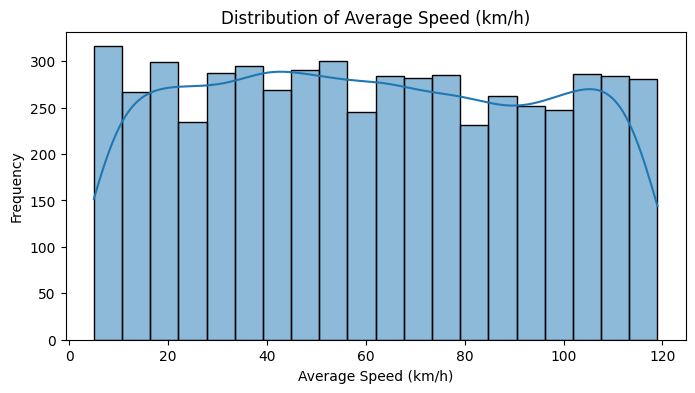

/tmp/ipython-input-3883558680.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Accident_Occurred', data=newdf, palette='pastel')


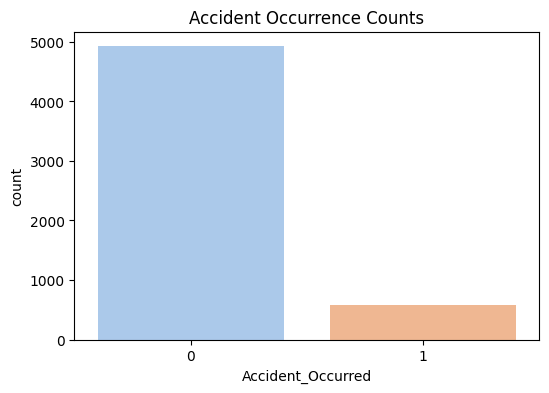

/tmp/ipython-input-3883558680.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Weather', y='Vehicle_Count', data=newdf, palette='Set3')


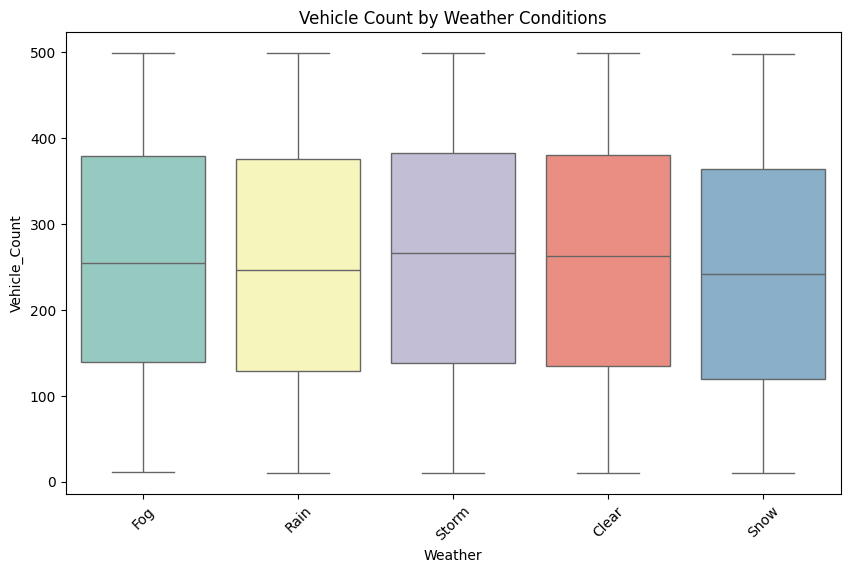

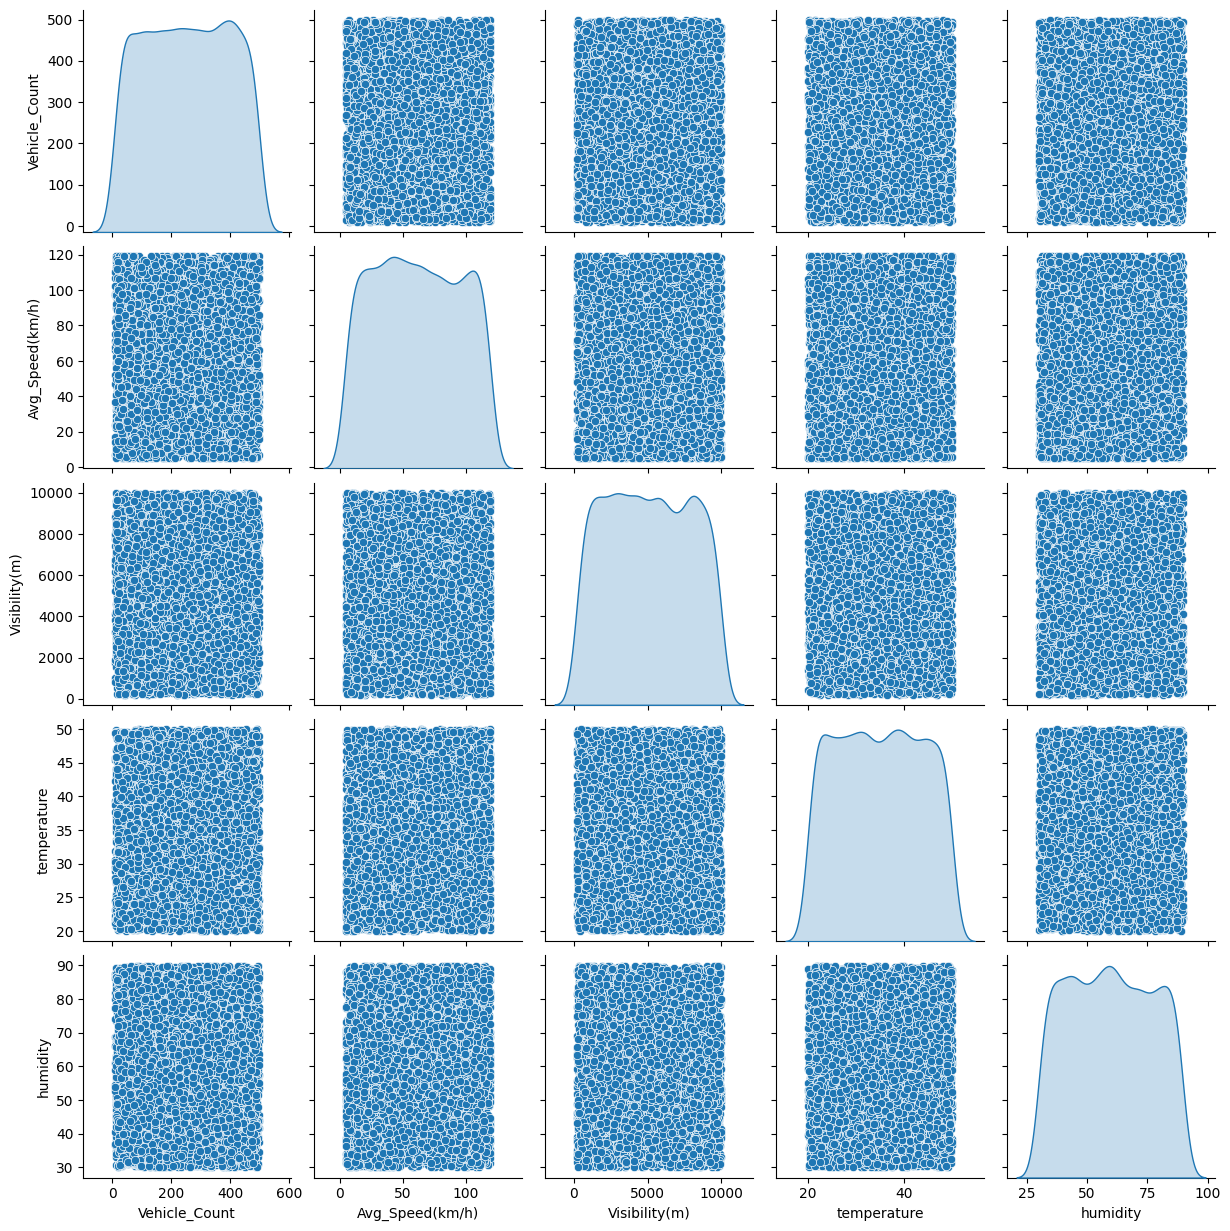

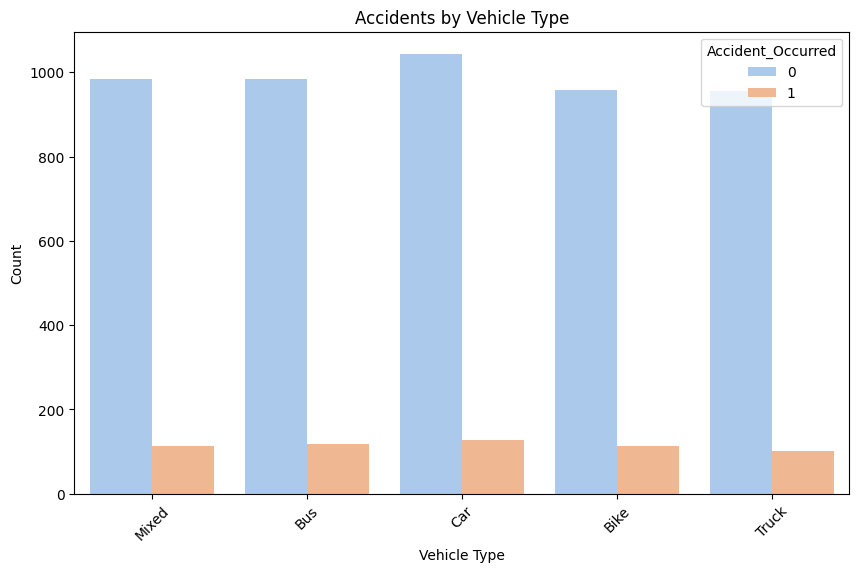

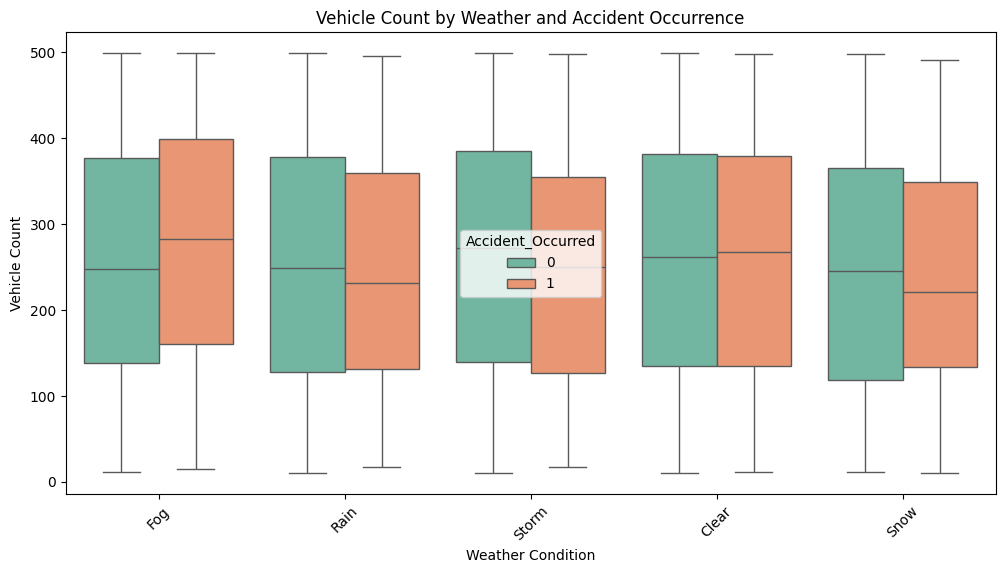

In [ ]:
# Histogram for average speed
plt.figure(figsize=(8, 4))
sns.histplot(newdf['Avg_Speed(km/h)'], bins=20, kde=True)
plt.title('Distribution of Average Speed (km/h)')
plt.xlabel('Average Speed (km/h)')
plt.ylabel('Frequency')
plt.show()

# Count plot for Accident Occurred
plt.figure(figsize=(6, 4))
sns.countplot(x='Accident_Occurred', data=newdf, palette='pastel')
plt.title('Accident Occurrence Counts')
plt.show()

# Box plot for Vehicle Count by Weather conditions
plt.figure(figsize=(10, 6))
sns.boxplot(x='Weather', y='Vehicle_Count', data=newdf, palette='Set3')
plt.title('Vehicle Count by Weather Conditions')
plt.xticks(rotation=45)
plt.show()

# Pair plot for a subset of numeric columns if dataset is not too large
subset_cols = ['Vehicle_Count', 'Avg_Speed(km/h)', 'Visibility(m)', 'temperature', 'humidity']
sns.pairplot(df[subset_cols], diag_kind='kde')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Vehicle_Type', hue='Accident_Occurred', data=newdf, palette='pastel')
plt.title('Accidents by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Weather', y='Vehicle_Count', hue='Accident_Occurred', data=newdf, palette='Set2')
plt.title('Vehicle Count by Weather and Accident Occurrence')
plt.xlabel('Weather Condition')
plt.ylabel('Vehicle Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

#Label Encoding
newdf['Accident_Occurred'] = newdf['Accident_Occurred'].map({'Yes': 1, 'No': 0})

# Feature groups
numeric = ['Vehicle_Count', 'Avg_Speed(km/h)', 'Visibility(m)', 'temperature', 'humidity']
categorical = ['Traffic_Density', 'Weather', 'Road_Condition']

#Create my feature and target
X = newdf.drop('Accident_Occurred', axis=1) #All of the newdf without the target variable
y = newdf['Accident_Occurred']

# Preprocessor1
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric),
        ('cat', OneHotEncoder(drop= 'first',handle_unknown='ignore'), categorical)
    ]
)
#new preprocessing using pipeline
#first column transformer
trf1 = ColumnTransformer([
    ('ohe_categorical', OneHotEncoder(drop='first', handle_unknown = 'ignore'), [2,3,4,6])
],remainder = 'passthrough')

#second column transformer for scaling
trf2 = ColumnTransformer([
    ('scaler', StandardScaler(), slice(0,10))
])
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)






In [ ]:
#third pipeline for the training
trf3 = LogisticRegression(max_iter = 1000, class_weight = 'balanced')

#this is main pipeline where everything happens
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3)
])

pipe.fit(X_train,y_train)

#now we are working on the prediction
y_pred = pipe.predict(X_test)

model_accuracy = accuracy_score(y_test,y_pred)
print("This is for the sequential pipeline")
print(f'Your accuracy score is : {model_accuracy}')
model_class_report = classification_report(y_test,y_pred)
print(f'Your classification report is : {model_class_report}')

This is for the sequential pipeline
Your accuracy score is : 0.4990909090909091
Your classification report is :               precision    recall  f1-score   support

           0       0.91      0.50      0.64       993
           1       0.10      0.53      0.17       107

    accuracy                           0.50      1100
   macro avg       0.50      0.51      0.41      1100
weighted avg       0.83      0.50      0.60      1100



In [ ]:
#Logistic regression
lr_model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('clf', LogisticRegression(max_iter=1000, class_weight = 'balanced'))
])

lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

print("Logistic Regression Results (parallel):")
print(classification_report(y_test, lr_preds))

Logistic Regression Results (parallel):
              precision    recall  f1-score   support

           0       0.89      0.52      0.65       993
           1       0.09      0.42      0.14       107

    accuracy                           0.51      1100
   macro avg       0.49      0.47      0.40      1100
weighted avg       0.81      0.51      0.60      1100



In [124]:
#Random Forest
rf_model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('clf', RandomForestClassifier(
        n_estimators=300, random_state=24, class_weight = 'balanced', max_depth = None
    ))
])

rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("Random Forest Results:")
print(classification_report(y_test, rf_preds))

Random Forest Results:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       993
           1       0.00      0.00      0.00       107

    accuracy                           0.90      1100
   macro avg       0.45      0.50      0.47      1100
weighted avg       0.81      0.90      0.86      1100



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [130]:
#we are applying sequential transformation to improve the model accuracy
trf4 = RandomForestClassifier(
     n_estimators=300,
    class_weight="balanced",
    max_depth=None,
    random_state=24
)

rfmodel = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf4',trf4)
])

rfmodel.fit(X_train,y_train)
#now we are working on the prediction
y_pred1 = rfmodel.predict(X_test)

model_accuracy = accuracy_score(y_test,y_pred1)
print(f'Your accuracy score is : {model_accuracy}')
model_class_report = classification_report(y_test,y_pred1)
print(f'Your classification report is : {model_class_report}')

Your accuracy score is : 0.5727272727272728
Your classification report is :               precision    recall  f1-score   support

           0       0.91      0.59      0.71       993
           1       0.10      0.45      0.17       107

    accuracy                           0.57      1100
   macro avg       0.51      0.52      0.44      1100
weighted avg       0.83      0.57      0.66      1100



Random Forest Classification Report:

              precision    recall  f1-score   support

           0      0.908     0.586     0.712       993
           1      0.105     0.449     0.170       107

    accuracy                          0.573      1100
   macro avg      0.506     0.517     0.441      1100
weighted avg      0.830     0.573     0.660      1100


Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0      0.892     0.516     0.653       993
           1      0.086     0.421     0.142       107

    accuracy                          0.506      1100
   macro avg      0.489     0.468     0.398      1100
weighted avg      0.814     0.506     0.604      1100



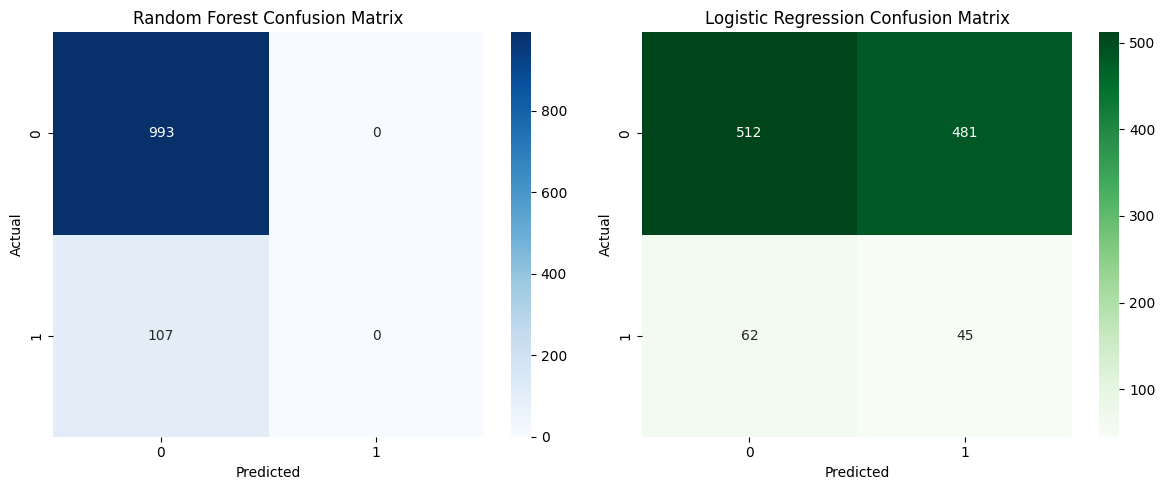

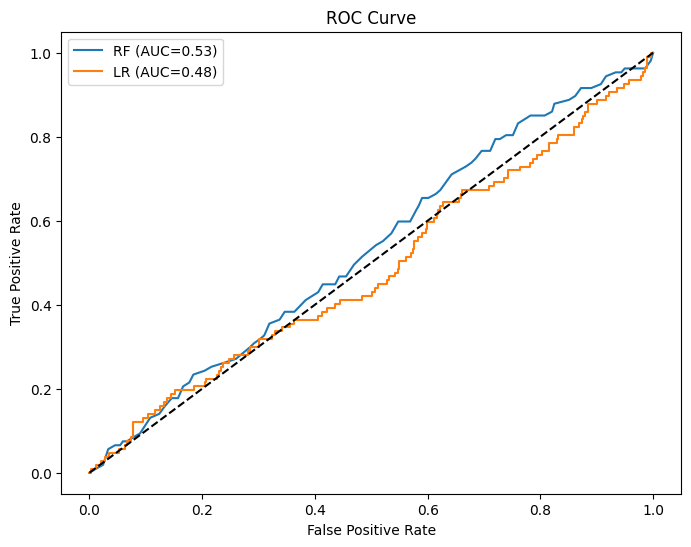

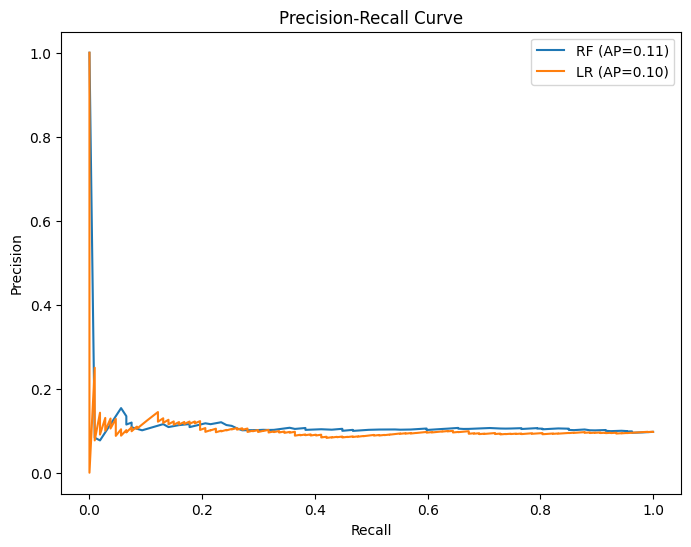


Random Forest Feature Importances:
                              Feature  Importance
3                        Weather_Fog    0.172192
2          Traffic_Density_Very High    0.170290
0                Traffic_Density_Low    0.168753
4                       Weather_Rain    0.168286
1             Traffic_Density_Medium    0.154188
5                       Weather_Snow    0.017958
13                       temperature    0.017603
7            Road_Condition_Slippery    0.017412
10                     Vehicle_Count    0.017198
12                     Visibility(m)    0.016421
14                          humidity    0.016409
8   Road_Condition_Under Maintenance    0.016363
6                      Weather_Storm    0.016262
9                 Road_Condition_Wet    0.015668
11                   Avg_Speed(km/h)    0.014997


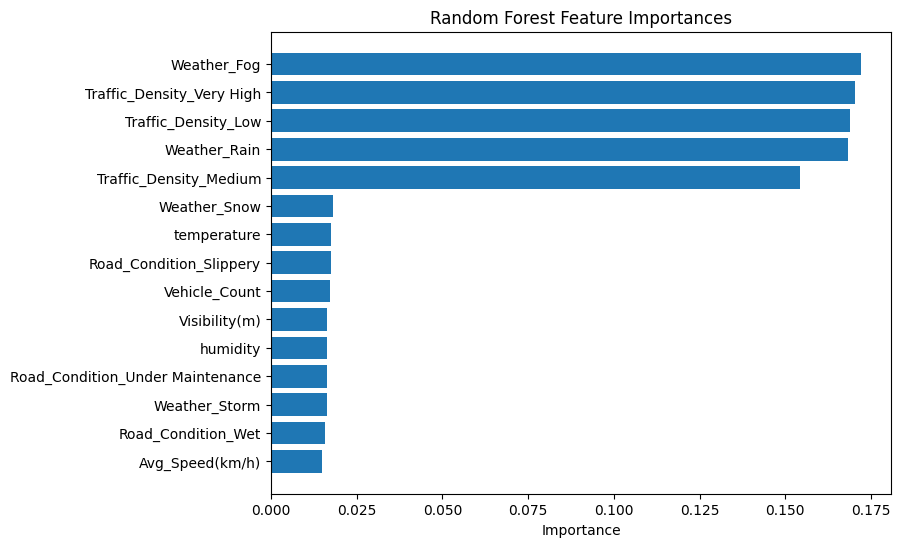


Logistic Regression Coefficients:
                              Feature  Coefficient
7            Road_Condition_Slippery     0.186337
5                       Weather_Snow     0.154810
6                      Weather_Storm     0.086970
10                     Vehicle_Count     0.064350
1             Traffic_Density_Medium     0.056767
2          Traffic_Density_Very High     0.038302
9                 Road_Condition_Wet     0.022423
8   Road_Condition_Under Maintenance     0.015173
3                        Weather_Fog     0.012174
11                   Avg_Speed(km/h)     0.002423
0                Traffic_Density_Low    -0.043014
4                       Weather_Rain    -0.057129
14                          humidity    -0.060030
13                       temperature    -0.148323
12                     Visibility(m)    -0.267142


In [132]:

rf_proba = rfmodel.predict_proba(X_test)[:, 1]
lr_proba = lr_model.predict_proba(X_test)[:, 1]

# Evaluation: Classification Reports

print("Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred1, digits=3))
print("\nLogistic Regression Classification Report:\n")
print(classification_report(y_test, lr_preds, digits=3))

# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12,5))
cm_rf = confusion_matrix(y_test, rf_preds)
cm_lr = confusion_matrix(y_test, lr_preds)

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Random Forest Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Logistic Regression Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# ROC Curves
plt.figure(figsize=(8,6))
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_proba)
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_proba)

plt.plot(fpr_rf, tpr_rf, label=f'RF (AUC={roc_auc_score(y_test, rf_proba):.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'LR (AUC={roc_auc_score(y_test, lr_proba):.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Precision-Recall Curves
plt.figure(figsize=(8,6))
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_proba)
precision_lr, recall_lr, _ = precision_recall_curve(y_test, lr_proba)

plt.plot(recall_rf, precision_rf, label=f'RF (AP={average_precision_score(y_test, rf_proba):.2f})')
plt.plot(recall_lr, precision_lr, label=f'LR (AP={average_precision_score(y_test, lr_proba):.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


# Feature Importances (RF)

cat_features = rf_model.named_steps['preprocess'].named_transformers_['cat'].get_feature_names_out()
all_features = list(cat_features) + numeric

importances = rf_model.named_steps['clf'].feature_importances_
fi_df = pd.DataFrame({'Feature': all_features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print("\nRandom Forest Feature Importances:\n", fi_df)

plt.figure(figsize=(8,6))
plt.barh(fi_df['Feature'], fi_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Random Forest Feature Importances')
plt.show()

# Coefficients (Logistic Regression)
lr_coef = lr_model.named_steps['clf'].coef_[0]
coef_df = pd.DataFrame({'Feature': all_features, 'Coefficient': lr_coef}).sort_values(by='Coefficient', ascending=False)
print("\nLogistic Regression Coefficients:\n", coef_df)